### Homework 10 Digit Classification with Machine Learning

In [2]:
# load packages
import os
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load train_dataset

train_dataset = []
for label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    img_path = os.path.join('./data', 'train', str(label))
    for img in os.listdir(img_path):
        image = mpimg.imread(os.path.join(img_path, img))
        #test for image size and append to train_dataset list if 28x28 pixel image
        if image.shape == (28, 28):
            train_dataset.append((image, label))

#load test_dataset
test_dataset = []
for label in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    img_path = os.path.join('./data', 'test', str(label))
    for img in os.listdir(img_path):
        image = mpimg.imread(os.path.join(img_path, img))
        #test for image size and append to test_dataset list if 28x28 pixel image
        if image.shape == (28, 28):
            test_dataset.append((image, label))


print('The number of Training Data: ', len(train_dataset))
print('The number of Testing Data: ', len(test_dataset))
print('The size of images: ', train_dataset[0][0].shape)

The number of Training Data:  60000
The number of Testing Data:  10000
The size of images:  (28, 28)


In [4]:
# convert images into vectors

train_features = []
train_labels = []

for image, label in train_dataset:
    flattened_image = image.reshape(1, -1)[0]
    train_features.append(flattened_image)
    train_labels.append(label)

train_features = np.array(train_features)
train_labels = np.array(train_labels)

test_features = []
test_labels = []

for image, label in test_dataset:
    flattened_image = image.reshape(1, -1)[0]
    test_features.append(flattened_image)
    test_labels.append(label)

test_features = np.array(test_features)
test_labels = np.array(test_labels)

In [18]:
# train the classifier (choose one from the three options)
classifier = LogisticRegression() # accuracy ~ 92.52%
#classifier = KNeighborsClassifier() # accuracy ~ 96.90%
#classifier = LinearSVC() # accuracy ~ 91.95%
classifier.fit(train_features, train_labels)


/Users/frank/git/CSC251/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
# determine accuracy
accuracy = classifier.score(test_features, test_labels)
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

Test Accuracy: 92.52%


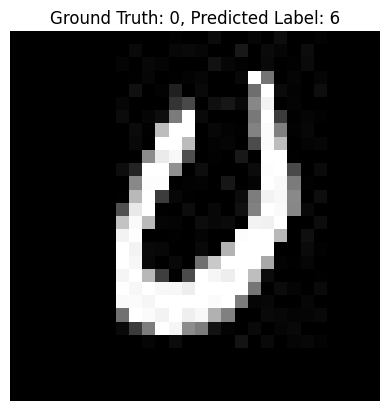

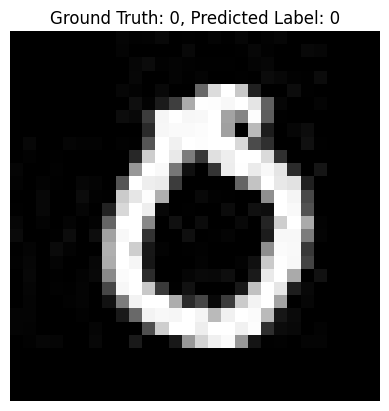

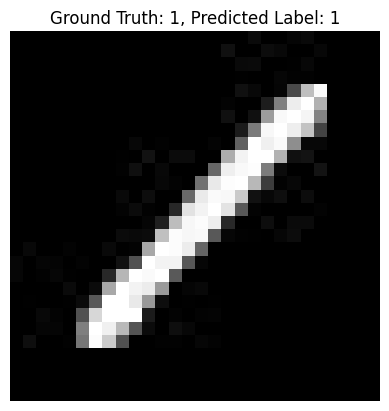

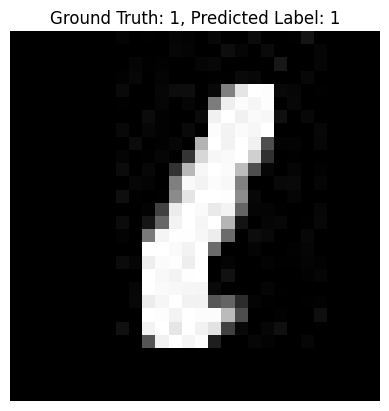

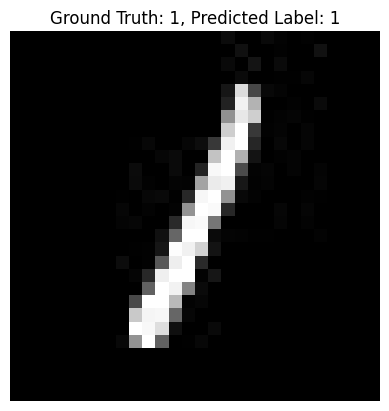

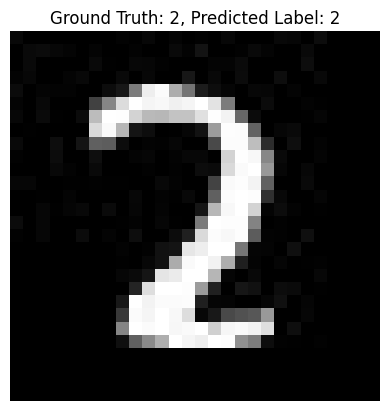

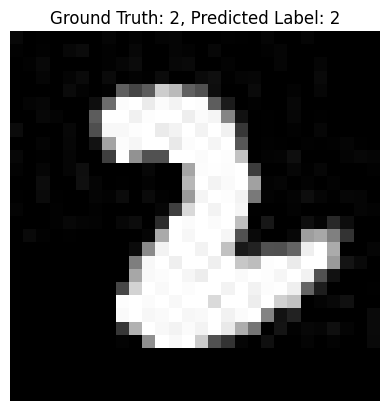

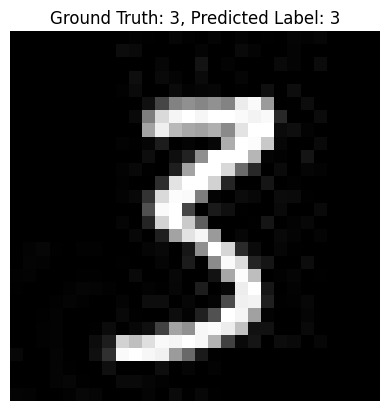

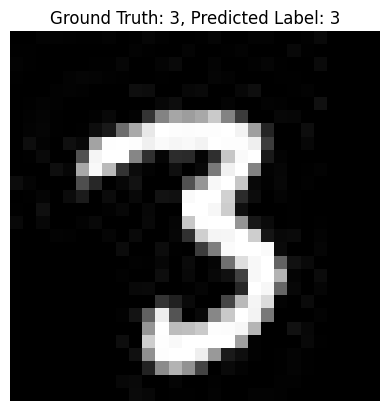

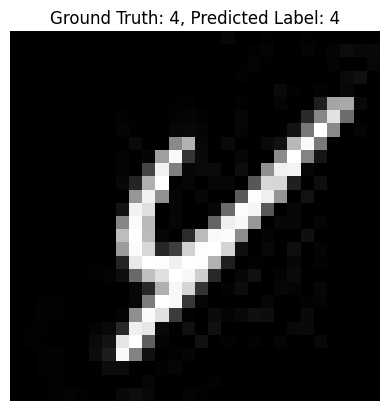

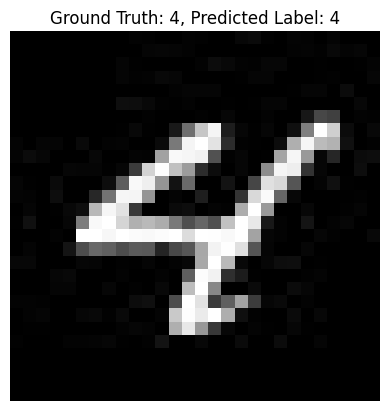

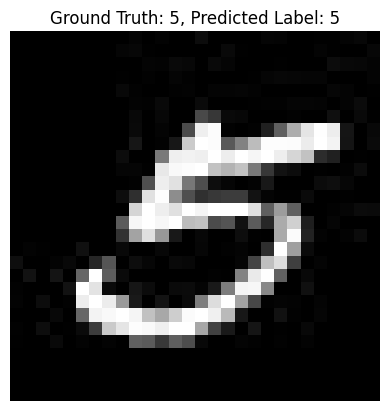

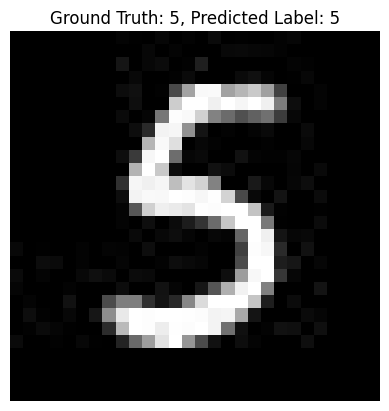

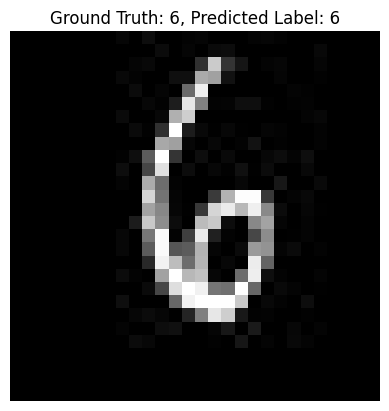

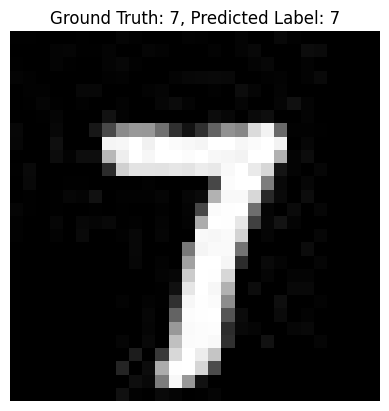

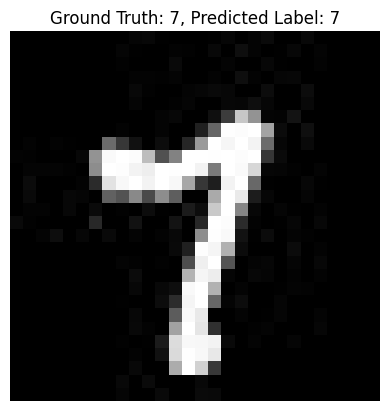

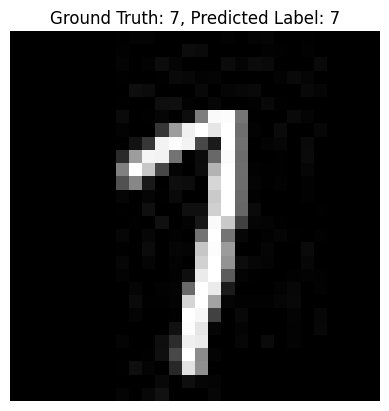

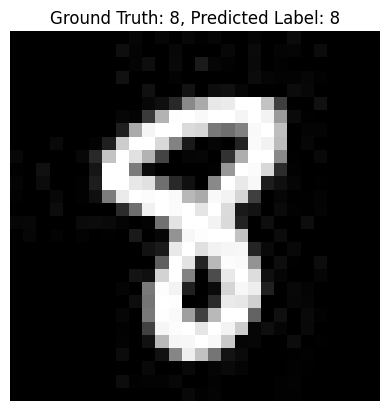

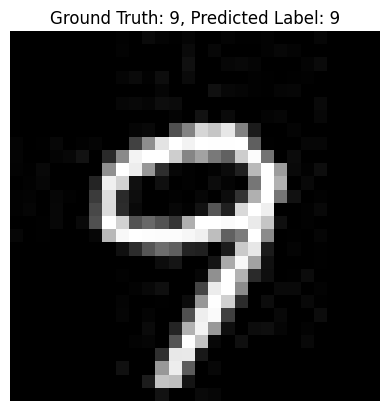

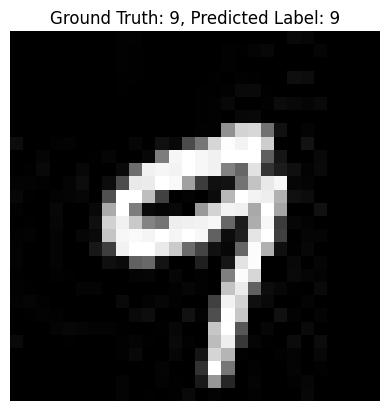

In [20]:
# display every 500th image
for i in range(0, len(test_features), 500):
    image_vector = test_features[i]
    image_matrix = image_vector.reshape(28, 28)
    plt.imshow(image_matrix, cmap='gray')
    plt.title(f'Ground Truth: {test_labels[i]}, Predicted Label: {classifier.predict([image_vector])[0]}')
    plt.axis('off')
    plt.show()

#### ***a) Compare the performance (accuracy and runtime) of the 3 classifiers. Specify how your notebook was run: Google Colab, JupyterLite, or locally on laptop/desktop (specify OS/type)***

My notebook was run locally on my laptop (MacOS) in VSCode using a local kernel. Among the 3 classifiers, KNN was the quickest to train, followed by Logistic Regression, and then lastly LinearSVC. This is because KNN is a "lazy" algorithm, where the computation is not done until scoring. Logistic Regression has relatively simple math required for its computation compared to LinearSVC, which leads to the difference in runtime. Accuracy wise, KNN was the best, followed by Logistic Regression, then LinearSVC.



#### ***b) Why do you think a specific classifier has better or poorer performance?***

I believe KNN outperforms Logistic Regression because a number being visually similar to other written instances of that number is a stronger indication of what number it is than any specific visual details of that number. For example a 0 with a "gap" not fully closed may indicate to Logistic Regression that this "gap" is indicative of a 6, but a KNN algorithm would be able to recognize that it is basically almost the same as a proper 0. LinearSVC has a similar problem as Regression, but with more complicated math.